# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Member Task 1

## Read in csv files

In [2]:
confirmed_cases = pd.read_csv("../Project-Part3/Data/covid_confirmed_usafacts.csv")
deaths = pd.read_csv("../Project-Part3/Data/covid_deaths_usafacts.csv")
population = pd.read_csv("../Project-Part3/Data/covid_county_population_usafacts.csv")
hospital_data = pd.read_csv('../Project-Part3/Data/Definitive_Healthcare_Hospital_Beds_0914.csv')

In [3]:
confirmed_CA = confirmed_cases[confirmed_cases.State == 'CA']
cases_CA = confirmed_CA[confirmed_CA.countyFIPS > 0]
population_CA = population[population.State == 'CA']
pop_CA = population_CA[population_CA.countyFIPS > 0]
death_cases_CA = deaths[deaths.State == 'CA']
deaths_CA = death_cases_CA[death_cases_CA.countyFIPS > 0]

In [4]:
infections_CA = cases_CA.sum()[4:]
infections_CA

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          2
             ...  
10/20/20    883574
10/21/20    886954
10/22/20    893770
10/23/20    899280
10/24/20    903653
Length: 277, dtype: object

In [5]:
death_week_CA = deaths_CA.sum()[4:]
death_week_CA

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
9/11/20    14261
9/12/20    14333
9/13/20    14385
9/14/20    14467
9/15/20    14615
Length: 238, dtype: object

In [6]:
print(cases_CA.shape)
print(deaths_CA.shape)

(59, 281)
(59, 242)


# Confirm first day of infection

In [7]:
cases_firstDay = cases_CA.iloc[:,[8]] #find first day of infection
cases_firstDay_infect = cases_firstDay[cases_firstDay > 0] #factor for confirmed cases greater than 0
cases_firstDay_infect.dropna() #drop NaN values to find only the rows with actual cases

,1/26/20
211,1.0
222,1.0


# Confirm first day of deaths

In [8]:
deaths_firstDay = deaths_CA.iloc[:,[19]] #find first day of infection
deaths_firstDay_infect = deaths_firstDay[deaths_firstDay > 0] #factor for confirmed cases greater than 0
deaths_firstDay_infect.dropna() #drop NaN values to find only the rows with actual cases

,2/6/20
235,1.0


In [9]:
cases_CA.iloc[[19,30],:] #find the counties that correspond to the first day of infection

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
211,6037,Los Angeles County,CA,6,0,0,0,0,1,1,...,286183,287222,288136,288451,289366,289366,290486,294065,296821,298937
222,6059,Orange County,CA,6,0,0,0,0,1,1,...,56436,56587,56672,56868,57071,57373,57635,57848,58010,58326


In [10]:
deaths_CA.iloc[[43],:]

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
235,6085,Santa Clara County,CA,6,0,0,0,0,0,0,...,260,260,260,263,263,276,280,283,283,287


# Collect data for California daily cases and deaths

In [11]:
data_CA = pd.DataFrame({'infections':infections_CA, 'deaths':death_week_CA})
data_CA

,infections,deaths
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,2,0
...,...,...
9/5/20,735452,13707
9/6/20,737650,13728
9/7/20,740050,13761
9/8/20,743148,13812


In [12]:
week = 1
cases_weekly = []
deaths_weekly = []
for x in range(6,len(data_CA),7):
    cases_weekly.append(data_CA.iloc[x][0])
    deaths_weekly.append(data_CA.iloc[x][1])
    week = week + 1

In [13]:
data_weekly = pd.DataFrame({'weekly':range(1,len(cases_weekly)+ 1), 'infections':cases_weekly, 'deaths':deaths_weekly})
data_weekly.head()

,weekly,infections,deaths
0,1,3,0.0
1,2,857413,NaN
2,3,879572,NaN
3,4,829436,NaN
4,5,4,0.0


In [14]:
#newcase = data_weekly.iloc[0][1]
#data_weekly.infections = data_weekly.infections.diff()
#data_weekly = data_weekly.fillna(newcase)
#data_weekly.deaths = data_weekly.deaths.diff()
#data_weekly = data_weekly.fillna(0)
#data_weekly

# Linear/Nonlinear regression models for cases

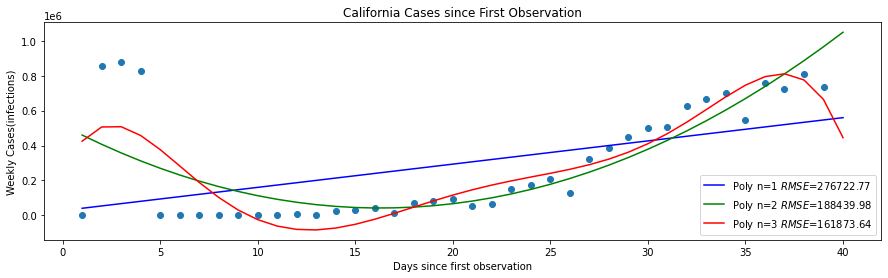

In [15]:
import statsmodels.formula.api as smf
from  statsmodels.tools.eval_measures import rmse
plt.figure(figsize = (15,4))
plt.scatter(data_weekly.weekly, data_weekly.infections)
x = pd.DataFrame({'weekly': np.linspace(data_weekly.weekly.min(), data_weekly.weekly.max()+ 1, 40)})
#1st order polynomial
infections_poly_1 = smf.ols(formula='infections ~ weekly', data=data_weekly).fit()
plt.plot(x.weekly,infections_poly_1.predict(x), 'b-', label='Poly n=1 $RMSE$=%.2f' % rmse(data_weekly.infections, infections_poly_1.predict(data_weekly.weekly)))
#2nd order polynomial
infections_poly_2 = smf.ols(formula='infections ~ 1 + weekly + I(weekly ** 2.0)', data=data_weekly).fit()
plt.plot(x.weekly,infections_poly_2.predict(x), 'g-', label='Poly n=2 $RMSE$=%.2f' % rmse(data_weekly.infections, infections_poly_2.predict(data_weekly.weekly)))
#3rd order polynomial
infections_poly_3 = smf.ols(formula='infections ~ 1 + weekly + I(weekly ** 2.0) + I(weekly ** 3.0)+I(weekly ** 4.0)+I(weekly ** 5.0)+I(weekly ** 6.0)', data=data_weekly).fit()
plt.plot(x.weekly,infections_poly_3.predict(x), 'r-', label='Poly n=3 $RMSE$=%.2f' % rmse(data_weekly.infections, infections_poly_3.predict(data_weekly.weekly)))

plt.xlabel('Days since first observation')
plt.ylabel('Weekly Cases(infections)')
plt.title('California Cases since First Observation')
plt.legend()

# Linear/Nonlinear models for deaths

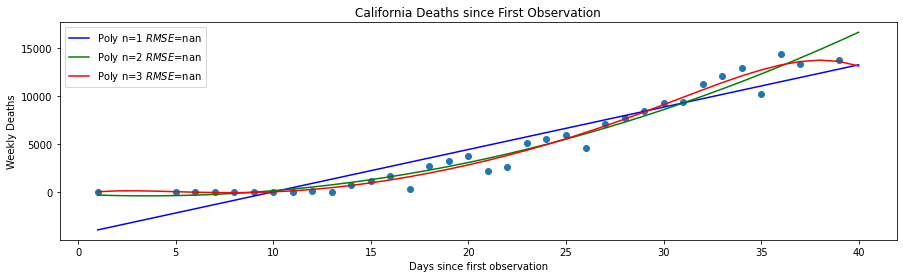

In [16]:
plt.figure(figsize = (15,4))
plt.scatter(data_weekly.weekly, data_weekly.deaths)
x = pd.DataFrame({'weekly': np.linspace(data_weekly.weekly.min(), data_weekly.weekly.max()+ 1, 40)})
#1st order polynomial
deaths_poly_1 = smf.ols(formula='deaths ~ weekly', data=data_weekly).fit()
plt.plot(x.weekly,deaths_poly_1.predict(x), 'b-', label='Poly n=1 $RMSE$=%.2f' % rmse(data_weekly.deaths, deaths_poly_1.predict(data_weekly.weekly)))
#2nd order polynomial
deaths_poly_2 = smf.ols(formula='deaths ~ 1 + weekly + I(weekly ** 2.0)', data=data_weekly).fit()
plt.plot(x.weekly,deaths_poly_2.predict(x), 'g-', label='Poly n=2 $RMSE$=%.2f' % rmse(data_weekly.deaths, deaths_poly_2.predict(data_weekly.weekly)))
#3rd order polynomial
deaths_poly_3 = smf.ols(formula='deaths ~ 1 + weekly + I(weekly ** 2.0) + I(weekly ** 3.0)+I(weekly ** 4.0)+I(weekly ** 5.0)+I(weekly ** 6.0)', data=data_weekly).fit()
plt.plot(x.weekly,deaths_poly_3.predict(x), 'r-', label='Poly n=3 $RMSE$=%.2f' % rmse(data_weekly.deaths, deaths_poly_3.predict(data_weekly.weekly)))

plt.xlabel('Days since first observation')
plt.ylabel('Weekly Deaths')
plt.title('California Deaths since First Observation')
plt.legend()

# Identify top 5 at risk counties

In [17]:
county_risk_CA = confirmed_cases[confirmed_cases.State == 'CA']
case_risk_CA = county_risk_CA[county_risk_CA.countyFIPS > 0][1:]
case_risk_CA.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
193,6001,Alameda County,CA,6,0,0,0,0,0,0,...,22370,22408,22459,22636,22738,22807,22932,23001,23133,23215
194,6003,Alpine County,CA,6,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
195,6005,Amador County,CA,6,0,0,0,0,0,0,...,272,272,272,272,276,276,276,287,291,291
196,6007,Butte County,CA,6,0,0,0,0,0,0,...,2958,2961,2961,2961,3002,3015,3018,3030,3047,3047
197,6009,Calaveras County,CA,6,0,0,0,0,0,0,...,331,333,333,333,333,339,339,339,342,342


In [18]:
population_risk_CA = population[population.State == 'CA']
pop_risk_CA = population_risk_CA[population_risk_CA.countyFIPS > 0][1:]
pop_risk_CA.head()

,countyFIPS,County Name,State,population
193,6001,Alameda County,CA,1671329
194,6003,Alpine County,CA,1129
195,6005,Amador County,CA,39752
196,6007,Butte County,CA,219186
197,6009,Calaveras County,CA,45905


In [19]:
merge_CA = pop_risk_CA.merge(case_risk_CA, left_on = 'countyFIPS', right_on = 'countyFIPS')
normalized_CA = merge_CA.drop(columns =['County Name_y', 'State_y', 'stateFIPS'])
normalized_CA.head()

,countyFIPS,County Name_x,State_x,population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,6001,Alameda County,CA,1671329,0,0,0,0,0,0,...,22370,22408,22459,22636,22738,22807,22932,23001,23133,23215
1,6003,Alpine County,CA,1129,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
2,6005,Amador County,CA,39752,0,0,0,0,0,0,...,272,272,272,272,276,276,276,287,291,291
3,6007,Butte County,CA,219186,0,0,0,0,0,0,...,2958,2961,2961,2961,3002,3015,3018,3030,3047,3047
4,6009,Calaveras County,CA,45905,0,0,0,0,0,0,...,331,333,333,333,333,339,339,339,342,342


In [20]:
for x in normalized_CA.columns[4:]:
    normalized_CA[x] = normalized_CA[x] / normalized_CA['population'] *10000 #normalize by population of 10,000
normalized_CA.head()

,countyFIPS,County Name_x,State_x,population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,6001,Alameda County,CA,1671329,0.0,0.0,0.0,0.0,0.0,0.0,...,133.845580,134.072944,134.378091,135.437128,136.047421,136.460266,137.208174,137.621019,138.410810,138.901437
1,6003,Alpine County,CA,1129,0.0,0.0,0.0,0.0,0.0,0.0,...,26.572188,26.572188,26.572188,26.572188,26.572188,26.572188,26.572188,26.572188,26.572188,26.572188
2,6005,Amador County,CA,39752,0.0,0.0,0.0,0.0,0.0,0.0,...,68.424230,68.424230,68.424230,68.424230,69.430469,69.430469,69.430469,72.197625,73.203864,73.203864
3,6007,Butte County,CA,219186,0.0,0.0,0.0,0.0,0.0,0.0,...,134.953875,135.090745,135.090745,135.090745,136.961302,137.554406,137.691276,138.238756,139.014353,139.014353
4,6009,Calaveras County,CA,45905,0.0,0.0,0.0,0.0,0.0,0.0,...,72.105435,72.541118,72.541118,72.541118,72.541118,73.848165,73.848165,73.848165,74.501688,74.501688


In [21]:
highrisk_county_cases_CA = normalized_CA.sort_values(by = ['10/17/20'], ascending = False)[:5]
highrisk_county_cases_CA #organize from most cases to least cases to find top 5 at risk counties

,countyFIPS,County Name_x,State_x,population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
12,6025,Imperial County,CA,181215,0.0,0.0,0.0,0.0,0.0,0.0,...,682.780123,684.821897,684.821897,684.821897,688.408796,691.664597,695.858511,699.059129,700.824987,700.824987
15,6031,Kings County,CA,152940,0.0,0.0,0.0,0.0,0.0,0.0,...,530.600235,531.319472,531.319472,531.319472,533.084870,533.215640,533.215640,534.850268,535.896430,536.354126
14,6029,Kern County,CA,900202,0.0,0.0,0.0,0.0,0.0,0.0,...,369.083828,370.727903,370.727903,371.561050,372.105372,372.705237,373.582818,374.016054,375.193568,375.615695
53,6107,Tulare County,CA,466195,0.0,0.0,0.0,0.0,0.0,0.0,...,366.198694,367.228306,367.228306,367.228306,369.073027,371.454005,372.483617,373.770632,375.272150,375.272150
23,6047,Merced County,CA,277680,0.0,0.0,0.0,0.0,0.0,0.0,...,334.989916,335.422069,335.422069,335.422069,337.618842,338.014981,339.059349,339.923653,340.859983,340.859983


In [22]:
highrisk_sum_CA = highrisk_county_cases_CA.sum()[4:]
highrisk_sum_CA

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
10/20/20    2307.05
10/21/20     2314.2
10/22/20    2321.62
10/23/20    2328.05
10/24/20    2328.93
Length: 277, dtype: object

In [23]:
highrisk_CA = pd.DataFrame({'infections':highrisk_sum_CA})
highrisk_CA

,infections
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
10/20/20,2307.05
10/21/20,2314.2
10/22/20,2321.62
10/23/20,2328.05


In [24]:
week = 1
risk_weekly = []
for x in range(6,len(highrisk_CA),7):
    risk_weekly.append(highrisk_CA.iloc[x][0])
    week = week + 1

In [25]:
highrisk_weekly = pd.DataFrame({'weekly':range(1,len(risk_weekly)+ 1), 'infections':risk_weekly})
highrisk_weekly.head()

,weekly,infections
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


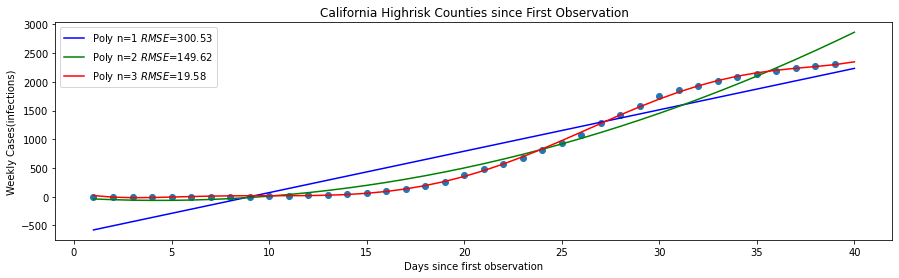

In [26]:
plt.figure(figsize = (15,4))
plt.scatter(highrisk_weekly.weekly, highrisk_weekly.infections)
highrisk_x = pd.DataFrame({'weekly': np.linspace(highrisk_weekly.weekly.min(), highrisk_weekly.weekly.max()+ 1, 40)})
#1st order polynomial
highrisk_poly_1 = smf.ols(formula='infections ~ weekly', data=highrisk_weekly).fit()
plt.plot(highrisk_x.weekly,highrisk_poly_1.predict(highrisk_x), 'b-', label='Poly n=1 $RMSE$=%.2f' % rmse(highrisk_weekly.infections, highrisk_poly_1.predict(highrisk_weekly.weekly)))
#2nd order polynomial
highrisk_poly_2 = smf.ols(formula='infections ~ 1 + weekly + I(weekly ** 2.0)', data=highrisk_weekly).fit()
plt.plot(highrisk_x.weekly,highrisk_poly_2.predict(highrisk_x), 'g-', label='Poly n=2 $RMSE$=%.2f' % rmse(highrisk_weekly.infections, highrisk_poly_2.predict(highrisk_weekly.weekly)))
#3rd order polynomial
highrisk_poly_3 = smf.ols(formula='infections ~ 1 + weekly + I(weekly ** 2.0) + I(weekly ** 3.0)+I(weekly ** 4.0)+I(weekly ** 5.0)+I(weekly ** 6.0)', data=highrisk_weekly).fit()
plt.plot(highrisk_x.weekly,highrisk_poly_3.predict(highrisk_x), 'r-', label='Poly n=3 $RMSE$=%.2f' % rmse(highrisk_weekly.infections, highrisk_poly_3.predict(highrisk_weekly.weekly)))

plt.xlabel('Days since first observation')
plt.ylabel('Weekly Cases(infections)')
plt.title('California Highrisk Counties since First Observation')
plt.legend()

# Model for top 5 counties

## Imperial County

In [58]:
cases_imperial = highrisk_county_cases_CA[highrisk_county_cases_CA['County Name_x'] == 'Imperial County']
cases_imperial.sum()[4:]
cases_imperial_df = pd.DataFrame({'infections':cases_imperial.sum()[4:]})
cases_imperial_df.head()

,infections
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [60]:
week = 1
imperial_weekly = []
for x in range(6,len(cases_imperial_df),7):
    imperial_weekly.append(cases_imperial_df.iloc[x][0])
    week = week + 1

In [62]:
imperial_cases = pd.DataFrame({'weekly':range(1,len(imperial_weekly)+ 1), 'infections':imperial_weekly})

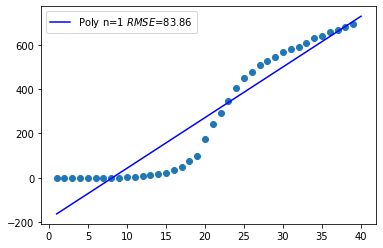

In [73]:
plt.scatter(imperial_cases.weekly, imperial_cases.infections)
imperial_x = pd.DataFrame({'weekly': np.linspace(imperial_cases.weekly.min(), imperial_cases.weekly.max()+ 1, 40)})
#1st order polynomial
imperial_poly_1 = smf.ols(formula='infections ~ weekly', data=imperial_cases).fit()
plt.plot(imperial_x.weekly,imperial_poly_1.predict(imperial_x), 'b-', label='Poly n=1 $RMSE$=%.2f' % rmse(imperial_cases.infections, imperial_poly_1.predict(imperial_cases.weekly)))
plt.legend()

## Kings County

In [74]:
cases_kings = highrisk_county_cases_CA[highrisk_county_cases_CA['County Name_x'] == 'Kings County']
cases_kings.sum()[4:]
cases_kings_df = pd.DataFrame({'infections':cases_kings.sum()[4:]})
cases_kings_df.head()

,infections
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [75]:
week = 1
kings_weekly = []
for x in range(6,len(cases_kings_df),7):
    kings_weekly.append(cases_kings_df.iloc[x][0])
    week = week + 1

In [76]:
kings_cases = pd.DataFrame({'weekly':range(1,len(kings_weekly)+ 1), 'infections':kings_weekly})

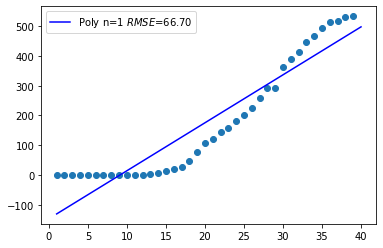

In [77]:
plt.scatter(kings_cases.weekly, kings_cases.infections)
kings_x = pd.DataFrame({'weekly': np.linspace(kings_cases.weekly.min(), kings_cases.weekly.max()+ 1, 40)})
#1st order polynomial
kings_poly_1 = smf.ols(formula='infections ~ weekly', data=kings_cases).fit()
plt.plot(kings_x.weekly,kings_poly_1.predict(kings_x), 'b-', label='Poly n=1 $RMSE$=%.2f' % rmse(kings_cases.infections, kings_poly_1.predict(kings_cases.weekly)))
plt.legend()

## Kerns County

In [78]:
cases_kern = highrisk_county_cases_CA[highrisk_county_cases_CA['County Name_x'] == 'Kern County']
cases_kern.sum()[4:]
cases_kern_df = pd.DataFrame({'infections':cases_kern.sum()[4:]})
cases_kern_df.head()

,infections
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [79]:
week = 1
kern_weekly = []
for x in range(6,len(cases_kern_df),7):
    kern_weekly.append(cases_kern_df.iloc[x][0])
    week = week + 1

In [80]:
kern_cases = pd.DataFrame({'weekly':range(1,len(kern_weekly)+ 1), 'infections':kern_weekly})

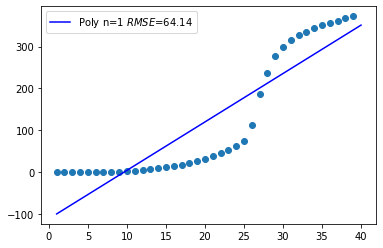

In [81]:
plt.scatter(kern_cases.weekly, kern_cases.infections)
kern_x = pd.DataFrame({'weekly': np.linspace(kern_cases.weekly.min(), kern_cases.weekly.max()+ 1, 40)})
#1st order polynomial
kern_poly_1 = smf.ols(formula='infections ~ weekly', data=kern_cases).fit()
plt.plot(kern_x.weekly,kern_poly_1.predict(kern_x), 'b-', label='Poly n=1 $RMSE$=%.2f' % rmse(kern_cases.infections, kern_poly_1.predict(kern_cases.weekly)))
plt.legend()

## Tulare County

In [82]:
cases_tulare = highrisk_county_cases_CA[highrisk_county_cases_CA['County Name_x'] == 'Tulare County']
cases_tulare.sum()[4:]
cases_tulare_df = pd.DataFrame({'infections':cases_tulare.sum()[4:]})
cases_tulare_df.head()

,infections
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [83]:
week = 1
tulare_weekly = []
for x in range(6,len(cases_tulare_df),7):
    tulare_weekly.append(cases_tulare_df.iloc[x][0])
    week = week + 1

In [84]:
tulare_cases = pd.DataFrame({'weekly':range(1,len(tulare_weekly)+ 1), 'infections':tulare_weekly})

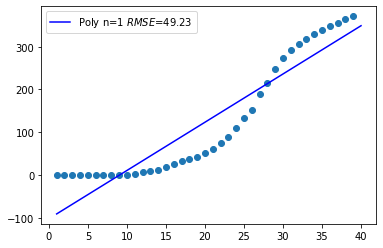

In [85]:
plt.scatter(tulare_cases.weekly, tulare_cases.infections)
tulare_x = pd.DataFrame({'weekly': np.linspace(tulare_cases.weekly.min(), tulare_cases.weekly.max()+ 1, 40)})
#1st order polynomial
tulare_poly_1 = smf.ols(formula='infections ~ weekly', data=tulare_cases).fit()
plt.plot(tulare_x.weekly,tulare_poly_1.predict(tulare_x), 'b-', label='Poly n=1 $RMSE$=%.2f' % rmse(tulare_cases.infections, tulare_poly_1.predict(tulare_cases.weekly)))
plt.legend()

## Merced County

In [86]:
cases_merced = highrisk_county_cases_CA[highrisk_county_cases_CA['County Name_x'] == 'Merced County']
cases_merced.sum()[4:]
cases_merced_df = pd.DataFrame({'infections':cases_merced.sum()[4:]})
cases_merced_df.head()

,infections
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [87]:
week = 1
merced_weekly = []
for x in range(6,len(cases_merced_df),7):
    merced_weekly.append(cases_merced_df.iloc[x][0])
    week = week + 1

In [88]:
merced_cases = pd.DataFrame({'weekly':range(1,len(merced_weekly)+ 1), 'infections':merced_weekly})

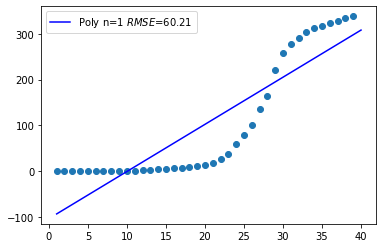

In [89]:
plt.scatter(merced_cases.weekly, merced_cases.infections)
merced_x = pd.DataFrame({'weekly': np.linspace(merced_cases.weekly.min(), merced_cases.weekly.max()+ 1, 40)})
#1st order polynomial
merced_poly_1 = smf.ols(formula='infections ~ weekly', data=merced_cases).fit()
plt.plot(merced_x.weekly,merced_poly_1.predict(merced_x), 'b-', label='Poly n=1 $RMSE$=%.2f' % rmse(merced_cases.infections, merced_poly_1.predict(merced_cases.weekly)))
plt.legend()

# Point of no return of California

In [27]:
hospital_data.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066157,33.495498,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,NaN,Phoenix,AZ,85012,...,13.0,4013.0,62.0,62.0,0,0,NaN,NaN,0,0
1,-110.965885,32.181263,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,NaN,Tucson,AZ,85723,...,19.0,4019.0,295.0,295.0,2,2,NaN,NaN,0,2
2,-119.779742,36.773323,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,NaN,Fresno,CA,93703,...,19.0,6019.0,54.0,54.0,2,2,NaN,NaN,0,2
3,-72.957610,41.284400,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,NaN,West Haven,CT,6516,...,9.0,9009.0,216.0,216.0,1,1,NaN,NaN,0,2
4,-75.606533,39.740206,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,NaN,Wilmington,DE,19805,...,3.0,10003.0,62.0,62.0,0,0,NaN,NaN,0,1


In [28]:
hospital_na = hospital_data.fillna('0')
hospital_na.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066,33.4955,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,0,Phoenix,AZ,85012,...,13,4013,62,62,0,0,0,0,0,0
1,-110.966,32.1813,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,0,Tucson,AZ,85723,...,19,4019,295,295,2,2,0,0,0,2
2,-119.78,36.7733,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,0,Fresno,CA,93703,...,19,6019,54,54,2,2,0,0,0,2
3,-72.9576,41.2844,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,0,West Haven,CT,6516,...,9,9009,216,216,1,1,0,0,0,2
4,-75.6065,39.7402,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,0,Wilmington,DE,19805,...,3,10003,62,62,0,0,0,0,0,1


In [29]:
state_hospital_data = hospital_na.groupby('HQ_STATE').sum()
state_hospital_beds = state_hospital_data.NUM_ICU_BEDS
hospital_beds = pd.DataFrame(state_hospital_beds)
hospital_beds.head()

,NUM_ICU_BEDS
HQ_STATE,
AK,193
AL,1637
AR,914
AS,21
AZ,1882


In [30]:
state_cases = confirmed_cases.groupby('State').sum()
state_cases.head()

,countyFIPS,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
State,,,,,,,,,,,,,,,,,,,,,
AK,64610,62,0,0,0,0,0,0,0,0,...,10322,10548,10758,10978,11181,11393,11605,11837,12118,12489
AL,71489,68,0,0,0,0,0,0,0,0,...,169161,170373,171662,172626,173483,174527,175673,177064,180916,183276
AR,380625,380,0,0,0,0,0,0,0,0,...,96523,97538,98421,99063,99595,100441,101596,102798,104135,105318
AZ,60208,64,0,0,0,0,1,1,1,1,...,228710,229434,230406,231147,231863,232937,233912,234906,235882,236772
CA,357364,360,0,0,0,0,2,3,3,4,...,868379,871447,873404,874795,879572,883574,886954,893770,899280,903653


In [38]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 15, )


# Use 5 variables from hospital data

In [32]:
hospital_data.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066157,33.495498,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,NaN,Phoenix,AZ,85012,...,13.0,4013.0,62.0,62.0,0,0,NaN,NaN,0,0
1,-110.965885,32.181263,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,NaN,Tucson,AZ,85723,...,19.0,4019.0,295.0,295.0,2,2,NaN,NaN,0,2
2,-119.779742,36.773323,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,NaN,Fresno,CA,93703,...,19.0,6019.0,54.0,54.0,2,2,NaN,NaN,0,2
3,-72.957610,41.284400,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,NaN,West Haven,CT,6516,...,9.0,9009.0,216.0,216.0,1,1,NaN,NaN,0,2
4,-75.606533,39.740206,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,NaN,Wilmington,DE,19805,...,3.0,10003.0,62.0,62.0,0,0,NaN,NaN,0,1


In [33]:
case_spread = hospital_na.set_index('HQ_STATE')
case_spread.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_ZIP_CODE,COUNTY_NAME,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
HQ_STATE,,,,,,,,,,,,,,,,,,,,,
AZ,-112.066,33.4955,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,0,Phoenix,85012,Maricopa,...,13,4013,62,62,0,0,0,0,0,0
AZ,-110.966,32.1813,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,0,Tucson,85723,Pima,...,19,4019,295,295,2,2,0,0,0,2
CA,-119.78,36.7733,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,0,Fresno,93703,Fresno,...,19,6019,54,54,2,2,0,0,0,2
CT,-72.9576,41.2844,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,0,West Haven,6516,New Haven,...,9,9009,216,216,1,1,0,0,0,2
DE,-75.6065,39.7402,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,0,Wilmington,19805,New Castle,...,3,10003,62,62,0,0,0,0,0,1


In [45]:
five_variables = case_spread.iloc[:,[14,15,16,19,21]]
five_variables.head()

,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,BED_UTILIZATION,AVG_VENTILATOR_USAGE
HQ_STATE,,,,,
AZ,62,62,0,0,0
AZ,295,295,2,0,2
CA,54,54,2,0,2
CT,216,216,1,0,2
DE,62,62,0,0,1


# Member Task 2

## Confidence Intervals

In [34]:
print('Confidence Interval for poly1')
infections_poly_1.conf_int()

Confidence Interval for poly1


,0,1
Intercept,-160928.398151,214988.171430
weekly,5125.808199,21506.172368


In [35]:
print('Confidence Intervals for poly2')
infections_poly_2.conf_int()

Confidence Intervals for poly2


,0,1
Intercept,315096.425111,717742.575655
weekly,-81513.369569,-35090.634375
I(weekly ** 2.0),1227.679011,2353.220602


In [36]:
print('Confidence Intervals for poly3')
infections_poly_3.conf_int()

Confidence Intervals for poly3


,0,1
Intercept,-343763.105140,802701.182317
weekly,-105223.441372,636106.458376
I(weekly ** 2.0),-154340.842020,-402.086623
I(weekly ** 3.0),509.707745,14611.554450
I(weekly ** 4.0),-656.660080,-23.015945
I(weekly ** 5.0),0.409300,14.103918
I(weekly ** 6.0),-0.116344,-0.002591
